In [1]:
## Packages to include
import matplotlib.pyplot as plt
import numpy as np
import math
from operator import add

In [2]:
## BLS12_381 data
logq = 381 ## bit size of the base field order
logp = 255 ## bit size of the elliptic curve group order
k = 8 ## number of chunks in the Exponential ElGamal construction
n = 4096 ## max degree of the polynomial in Danksharding
s = [i for i in range(1,n)] ## number of opened points during the protocol
logN = 3072 ## This provides 128-bit security
paillierPackingParam = math.floor(logN/logp)
expElgamalBandwidth = (logq*k)*np.array(s)+7*logq ## first term is the ciphertexts and the second term is the proofs
paillierBandwidth = (2*logN+512+2*logN)*np.array(s)+(381+256) ##The terms in order: ciphertexts, z_i, W_i, Cq, c
paillierCiphertexts = [math.floor(i) for i in np.array(s)/12]
packedPaillierBandwidth = np.array(paillierCiphertexts)*(381+4*logN)+np.array(s)*(3*logq+logq)
#mcExpElgamalBandwidth = 
#mcPaillierBandwidth = 

In [3]:
bitsExchanged = logp*n
print(paillierBandwidth[-1])
print(expElgamalBandwidth[-1])
print('The number of bits exchanged', bitsExchanged, paillierBandwidth[-1]/bitsExchanged, expElgamalBandwidth[-1]/bitsExchanged)

52416637
12484227
The number of bits exchanged 1044480 50.18443340226716 11.952576401654412


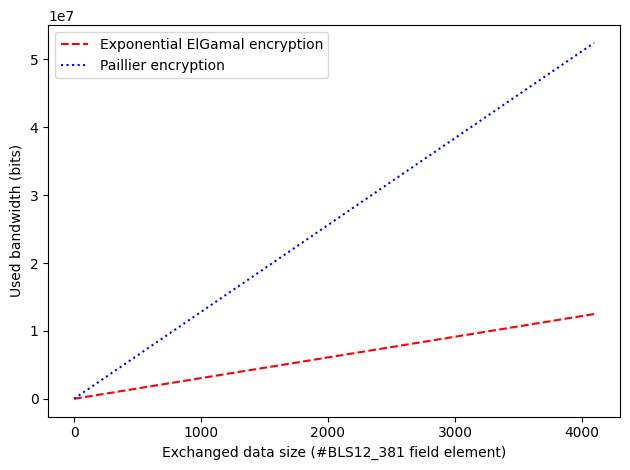

In [4]:
plt.plot(s,expElgamalBandwidth,linestyle = 'dashed',color='red', label="Exponential ElGamal encryption")
plt.plot(s,paillierBandwidth, linestyle = 'dotted', color='blue',label="Paillier encryption")
#plt.plot(s,packedPaillierBandwidth, linestyle = 'dotted', color='green',label="Packed Paillier encryption")
plt.legend()
plt.xlabel("Exchanged data size (#BLS12_381 field element)")
plt.ylabel("Used bandwidth (bits)")
plt.tight_layout()
plt.savefig("./Figures/proofSizes.pdf")
plt.show()

In [5]:
## Should we also put here the proof sizes of the multi-client model?

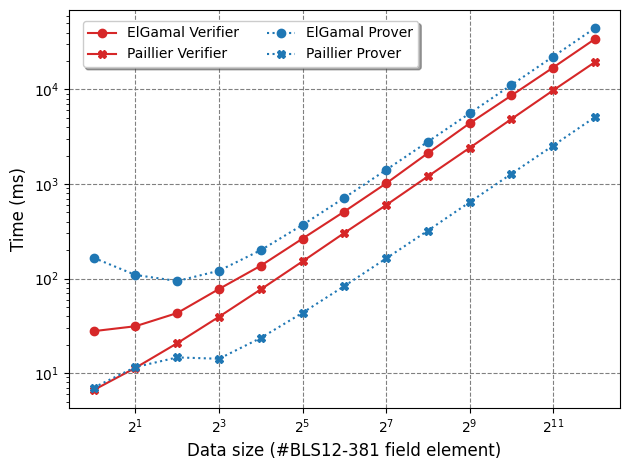

In [22]:
## Prover and verifier times
x_axis = [1<<exponent for exponent in range(13)]

proof_gen_ElGamal = [154.86,87.448,50.783,34.127,25.760,21.619,19.509,19.157,20.204,22.213,24.984,30.279,38.948]
rangeProofsAndEncryptionTimes = [89000/(2**(13-i)) for i in range(13)]

proof_vfy_ElGamal = [6.03,7.64,7.69,7.97,8.19,8.75,9.42,10.68,12.25,15.28,19.86,28.90,42.23]
range_proof_vfy_ElGamal = [11.77,21.79,34.44,68.23,127.09,253.12,500.32,1004.9,1991.1,4020.1,8039.2,16084.0,32133.0]
split_scalar_enc_vfy_ElGamal = [1.92,3.64,5.66,10.92,40.83,80.35,160.01,319.60,639.45,1277.1,2550.7]
total_proof_vfy_ElGamal = [27.796,31.336,43.210,77.583,136.80,264.56,511.48,1014.4,2119.5,4383.4,8630.0,17055.0,34149.0]

proof_gen_Paillier = [7.0327,11.586,14.667,14.188,23.555,43.434,83.285,163.02,321.44,641.81,1281.0,2549.2,5098.9]
proof_vfy_Paillier = [6.6277,11.374,20.728,39.452,76.829,151.92,303.81,597.88,1203.2,2411.3,4861.1,9780.2,19455.0]

fig, ax1 = plt.subplots()



color = 'tab:red'
ax1.set_xlabel('Data size (#BLS12-381 field element)', fontsize=12)
ax1.set_ylabel('Time (ms)', fontsize=12)
ax1.plot(x_axis, total_proof_vfy_ElGamal,marker="o", color=color,  label="ElGamal Verifier")
ax1.plot(x_axis, proof_vfy_Paillier,marker="X", color=color,label="Paillier Verifier")
ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y')
ax1.set_yscale('log',base=10)
## Adding a grid to the plot
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.xaxis.grid(color='gray', linestyle='dashed')

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#ax2.set_ylabel('Prover time (ms)', color=color, fontsize=12)  # we already handled the x-label with ax1
ax1.plot(x_axis, list(map(add,proof_gen_ElGamal,rangeProofsAndEncryptionTimes)),marker="o",linestyle="dotted",color=color, label="ElGamal Prover")
ax1.plot(x_axis, proof_gen_Paillier,marker="X",linestyle="dotted", color=color, label="Paillier Prover")
ax1.tick_params(axis='y')
#ax2.set_yscale('log',base=10)
#ax2.set_axisbelow('True')


ax1.legend(loc='upper center', bbox_to_anchor=(0.33, .99),
          ncol=2, fancybox=True, shadow=True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("./Figures/proverVerifierTimes.pdf")
plt.show()